In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train,batch_size=100,epochs=10)

Epoch 1/10
600/600 [==============================] - 21s 34ms/step - loss: 0.0607 - accuracy: 0.9834
Epoch 2/10
600/600 [==============================] - 20s 33ms/step - loss: 0.0381 - accuracy: 0.9884
Epoch 3/10
600/600 [==============================] - 20s 33ms/step - loss: 0.0296 - accuracy: 0.9906
Epoch 4/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 5/10
600/600 [==============================] - 22s 37ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 6/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 7/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0138 - accuracy: 0.9953
Epoch 8/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 9/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0121 - accuracy: 0.9962
Epoch 10/10
600/600 [==============================] - 21s 36ms/step - loss: 0.010

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 13ms/step - loss: 0.0717 - accuracy: 0.9854


[0.07171016186475754, 0.9854000210762024]

1/1 [==============================] - 0s 21ms/step
2


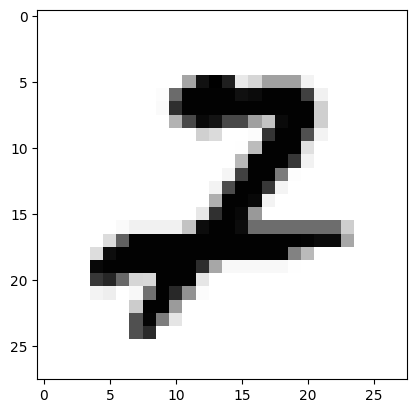

In [28]:
import matplotlib.pyplot as plt
image_index = 9009
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())